# Random Forest Classification

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


## Importing the dataset

In [3]:
df = pd.read_csv('Healthcare_data.csv')
dataset = pd.DataFrame()

for column in df.columns:
    if df[column].dtype == 'object':
        encoder = LabelEncoder()
        encoded_values = encoder.fit_transform(df[column])
        dataset[column] = encoded_values
    else:
        dataset[column] = df[column]

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[2133    0    0 ...    0    0    0]
 [ 443    0    0 ...    0    0    0]
 [3312    0    0 ...    0    1    0]
 ...
 [ 728    1    0 ...    0    0    0]
 [1788    0    0 ...    0    0    0]
 [1927    0    1 ...    0    0    0]]


In [6]:
print(y_train)

[2 2 3 ... 0 1 0]


In [7]:
print(X_test)

[[3345    1    0 ...    0    0    0]
 [ 923    0    0 ...    0    0    0]
 [2667    0    0 ...    0    0    0]
 ...
 [1353    1    0 ...    0    0    0]
 [3211    0    0 ...    0    0    0]
 [2863    1    0 ...    0    0    0]]


In [8]:
print(y_test)

[1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 3 2 2 1 3 1 0 1 1 1 2 1 7 0 0 0 1 2 1 1
 1 0 0 1 1 2 0 2 2 0 2 1 1 3 0 2 1 0 4 0 4 1 1 0 3 0 2 1 2 1 4 1 2 0 0 1 1
 3 0 2 2 0 3 2 4 0 1 2 1 3 2 0 0 2 1 0 1 3 1 0 1 0 1 2 2 1 2 1 0 0 1 0 3 1
 3 1 1 3 0 1 1 0 3 2 1 2 2 1 1 2 3 0 0 1 0 1 1 1 1 1 0 1 2 1 2 1 0 3 2 0 1
 0 5 2 0 3 0 1 1 1 0 0 6 2 2 1 1 0 0 0 0 2 1 1 1 0 0 0 3 0 3 1 1 0 1 1 1 1
 0 1 1 0 2 0 1 2 2 1 0 0 1 1 4 1 2 3 1 2 2 0 1 0 1 0 1 1 2 0 1 1 0 0 2 0 2
 2 2 1 0 2 1 2 0 0 0 0 1 0 0 1 2 1 2 2 1 1 1 0 1 3 2 2 2 2 1 1 1 2 1 4 1 0
 0 3 0 3 1 2 1 2 0 2 0 0 2 2 2 1 4 0 0 0 0 2 2 5 1 2 2 1 3 2 2 2 2 0 0 0 4
 1 1 3 3 3 2 0 1 1 2 3 1 2 2 1 4 0 1 2 1 0 1 3 0 0 1 2 1 0 3 2 1 2 0 1 0 3
 1 2 1 3 0 1 2 0 0 1 2 1 0 1 1 2 1 7 2 2 0 0 1 1 2 0 0 0 2 0 1 1 3 0 0 0 1
 1 1 0 2 2 0 2 2 1 2 0 0 0 0 2 2 3 1 5 2 0 3 1 1 2 1 1 0 2 1 3 0 1 0 0 1 2
 2 1 1 1 0 2 0 1 2 0 2 1 1 2 0 1 0 3 3 2 1 2 0 4 0 3 1 3 3 1 1 3 0 0 0 2 1
 1 0 1 1 0 0 0 2 0 0 2 1 3 4 3 4 0 2 0 0 1 1 1 1 3 3 1 0 0 1 0 0 1 2 1 2 0
 1 2 0 1 1 1 1 1 3 0 0 2 

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.44357461 -0.78298488 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [-1.26638711 -0.78298488 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [ 1.63650057 -0.78298488 -0.24906774 ... -0.06252443 15.99374878
  -0.15729152]
 ...
 [-0.97802079  1.27716387 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [ 0.09449959 -0.78298488 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [ 0.23514141 -0.78298488  4.01497198 ... -0.06252443 -0.06252443
  -0.15729152]]


In [11]:
print(X_test)

[[ 1.66989036  1.27716387 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [-0.78071751 -0.78298488 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [ 0.98388205 -0.78298488 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 ...
 [-0.34563849  1.27716387 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [ 1.5343076  -0.78298488 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]
 [ 1.18219713  1.27716387 -0.24906774 ... -0.06252443 -0.06252443
  -0.15729152]]


## Training the Random Forest Classification model on the Training set

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<AxesSubplot:>

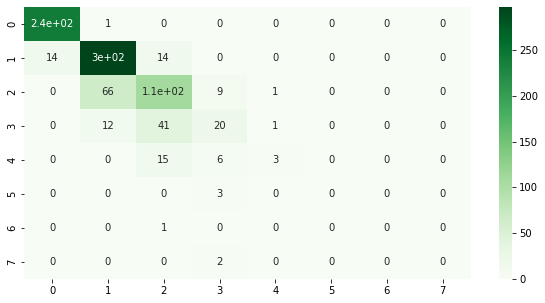

## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[242   1   0   0   0   0   0   0]
 [ 14 297  14   0   0   0   0   0]
 [  0  66 108   9   1   0   0   0]
 [  0  12  41  20   1   0   0   0]
 [  0   0  15   6   3   0   0   0]
 [  0   0   0   3   0   0   0   0]
 [  0   0   1   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0]]


0.7827102803738317

<AxesSubplot:>

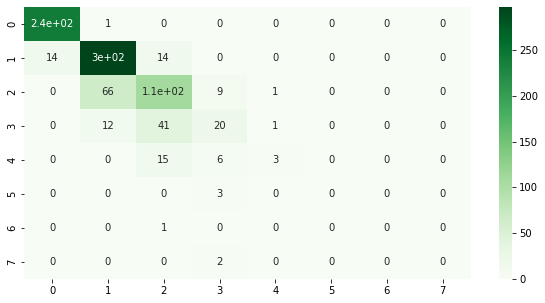

In [20]:
plt.figure(figsize=[10,5])

sns.heatmap(cm,annot=True,cmap='Greens')